In [1]:
from make_recommendation import UserRecs
import os

In [2]:
api_key = os.environ['GOODREADS_API_KEY']

Moses = 8683925

### Fit recommendations for our example user
Using an api key and a goodread user ID, the recommender gets the users rated books on goodreads and uses the books a user has rated in the top 10,000 books the recommender was trained on.

In [3]:
recs = UserRecs()
recs.fit(Moses, api_key)

### Unboosted Ratings Guess
If we only look at the recommendations based on the results of gradient descent on the book matrix and the user's rating we get these recommendations.

In [4]:
recs.df_recommendations.sort_values('rating_guess')[['title', 'name', 'race_gender']].head(10)

,title,name,race_gender
264,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,WHITE MALE
198,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,WHITE FEMALE
42,The Woman in White,Wilkie Collins,WHITE MALE
688,Shadows of the Empire (Star Wars),Steve Perry,WHITE MALE
58,"Vampire Mountain (Cirque Du Freak, #4)",Darren Shan,WHITE MALE
333,Chapterhouse: Dune (Dune Chronicles #6),Frank Herbert,WHITE MALE
338,Gravity's Rainbow,Thomas Pynchon,WHITE MALE
661,Fight Club,Chuck Palahniuk,WHITE MALE
291,"World Without End (Kingsbridge, #2)",Ken Follett,WHITE MALE
82,Sherlock Holmes: The Complete Novels and Stori...,Arthur Conan Doyle,WHITE MALE


### Plot the data to see what authors are underrepresented in the user's reading
We can see this user reads mainly white male authors and is mainly recommended more books by white male authors. We use the percentages this user has read of each author group to create a boost for each author. For this user, it would add close to 0 to the ratings guess for white male authors and closer to 1 for the black female authors.

177 out of 223 books that you have read are in the top 10,000 books on goodreads


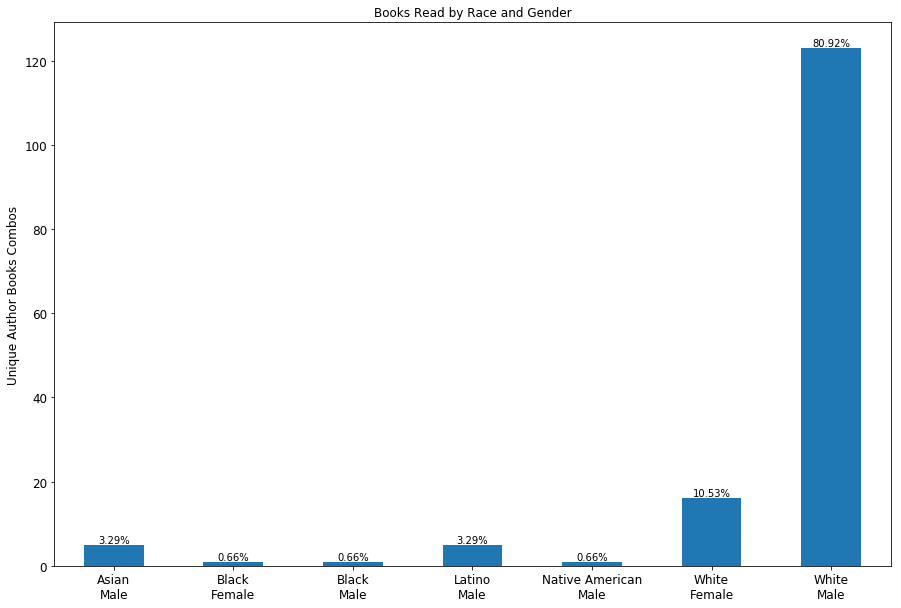

In [5]:
recs.plot_user_data()

### Show boosted recommendations for this user
After boosting scores for this user, we have more novel results that the user might not have discovered otherwise.

In [6]:
recs.df_recommendations[['title', 'name', 'race_gender']].head(10)

,title,name,race_gender
501,Cane River,Lalita Tademy,ASIAN FEMALE
441,"Breath, Eyes, Memory",Edwidge Danticat,LATINO FEMALE
195,Love in the Time of Cholera,Gabriel García Márquez,LATINO MALE
7,"Fullmetal Alchemist, Vol. 1 (Fullmetal Alchemi...",Hiromu Arakawa,ASIAN FEMALE
663,Beloved,Toni Morrison,BLACK FEMALE
24,The Autograph Man,Zadie Smith,BLACK FEMALE
652,Interpreter of Maladies,Jhumpa Lahiri,ASIAN FEMALE
262,The Atonement Child,Francine Rivers,WHITE FEMALE
227,First They Killed My Father: A Daughter of Cam...,Loung Ung,ASIAN FEMALE
469,The Known World,Edward P. Jones,BLACK MALE


### Show top recommendations for the categories this user reads the most
We also can find the top 5 categories that a user has read the largest percentage of and present the top results for those categories.

In [7]:
recs.print_categorical_recs(10)

Collections
[u'Interpreter of Maladies', u'The Stories of Eva Luna', u'Haroun and the Sea of Stories (Khalifa Brothers, #1)', u'La Dame aux Cam\xe9lias', u'The Snows of Kilimanjaro and Other Stories', u'Barrel Fever: Stories and Essays', u'Brokeback Mountain', u'Oblivion', u'Selected Stories', u'A Christmas Carol and Other Christmas Writings']
Graphic Novels
[u'Fullmetal Alchemist, Vol. 1 (Fullmetal Alchemist, #1)', u'Bleach, Volume 01', u'V for Vendetta', u'Superman: Birthright', u'Pride and Joy (Runaways, #1)']
Required Reading
[u'Breath, Eyes, Memory', u'Love in the Time of Cholera', u'Beloved', u'The Atonement Child', u'First They Killed My Father: A Daughter of Cambodia Remembers', u'The Known World', u'Memories of My Melancholy Whores', u'Tara Road', u'On Beauty', u'The Hungry Tide']
Suspense
[u"From Potter's Field (Kay Scarpetta, #6)", u'Pardonable Lies (Maisie Dobbs, #3)', u'Carter Beats the Devil', u'Cause of Death (Kay Scarpetta, #7)', u'City of the Beasts (Eagle and Jaguar, 